# Description of the breast lesion deep learning project

## Motivation and notes

## Publications data sources

Al-Dhabyani, W., Gomaa, M., Khaled, H., & Fahmy, A. (2019). Dataset of breast ultrasound images. Data in brief, 28, 104863. https://doi.org/10.1016/j.dib.2019.104863

Pawłowska, A., Ćwierz-Pieńkowska, A., Domalik, A., Jaguś, D., Kasprzak, P., Matkowski, R., Fura, Ł., Nowicki, A., & Zolek, N. (2024). A Curated Benchmark Dataset for Ultrasound Based Breast Lesion Analysis (Breast-Lesions-USG) (Version 1) [dataset]. The Cancer Imaging Archive. https://doi.org/10.7937/9WKK-Q141

**the following data is not included yet**

A. Abbasian Ardakani, A. Mohammadi, M. Mirza-Aghazadeh-Attari, U.R. Acharya, An open-access breast lesion ultrasound image database‏: Applicable in artificial intelligence studies, Computers in Biology and Medicine, 152 (2023) 106438. https://doi.org/10.1016/j.compbiomed.2022.106438



In [1]:
url4 = "https://qamebi.com/wp-content/uploads/2022/11/Benign.zip" #image, mask and masked image file .bmp files?
url5 = "https://qamebi.com/wp-content/uploads/2022/11/Malignant.zip"

# Loading and organizing data

In [2]:
import os
import shutil
import requests
from zipfile import ZipFile
from tqdm import tqdm

url1 = "https://scholar.cu.edu.eg/Dataset_BUSI.zip"
url2 = "https://www.cancerimagingarchive.net/wp-content/uploads/BrEaST-Lesions_USG-images_and_masks-Dec-15-2023.zip"
url3 = "https://www.cancerimagingarchive.net/wp-content/uploads/BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx"
data_dir = "data"

os.makedirs(data_dir, exist_ok=True)  # only created if does not exist

response1 = requests.get(url1, stream=True, verify=False)
zip_file_path1 = os.path.join(data_dir, "Dataset_BUSI.zip")
with open(zip_file_path1, "wb") as zip_file:
    total_size = int(response1.headers.get('content-length', 0))
    with tqdm(total=total_size, unit='B', unit_scale=True, desc=os.path.basename(zip_file_path1)) as pbar:
        for data in response1.iter_content(chunk_size=1024):
            pbar.update(len(data))
            zip_file.write(data)

with ZipFile(zip_file_path1, "r") as zip_ref:
    zip_ref.extractall(data_dir)

# put images into one directory
target_directory = os.path.join(data_dir, "Dataset_BUSI_with_GT")
os.makedirs(target_directory, exist_ok=True)
source_extracted_folder = os.path.join(data_dir, "Dataset_BUSI_with_GT")
categories = ['benign', 'malignant', 'normal']
for category in categories:
    subfolder_path = os.path.join(source_extracted_folder, category)
    for file in os.listdir(subfolder_path):
        src_path = os.path.join(subfolder_path, file)
        dest_path = os.path.join(target_directory, file)
        shutil.move(src_path, dest_path)
    os.rmdir(subfolder_path)

os.remove(zip_file_path1)

response2 = requests.get(url2, stream=True, verify=False)
zip_file_path2 = os.path.join(data_dir, "BrEaST-Lesions_USG-images_and_masks-Dec-15-2023.zip")
with open(zip_file_path2, "wb") as zip_file:
    total_size = int(response2.headers.get('content-length', 0))
    with tqdm(total=total_size, unit='B', unit_scale=True, desc=os.path.basename(zip_file_path2)) as pbar:
        for data in response2.iter_content(chunk_size=1024):
            pbar.update(len(data))
            zip_file.write(data)

with ZipFile(zip_file_path2, "r") as zip_ref:
    zip_ref.extractall(data_dir)

os.remove(zip_file_path2) 

response3 = requests.get(url3, stream=True, verify=False)
file_path3 = os.path.join(data_dir, "BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx")
with open(file_path3, "wb") as file:
    total_size = int(response3.headers.get('content-length', 0))
    with tqdm(total=total_size, unit='B', unit_scale=True, desc=os.path.basename(file_path3)) as pbar:
        for data in response3.iter_content(chunk_size=1024):
            pbar.update(len(data))
            file.write(data)

print("Done and saved to:", data_dir)

/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'scholar.cu.edu.eg'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
Dataset_BUSI.zip: 100%|███████████████████████| 206M/206M [11:20<00:00, 303kB/s]
/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cancerimagingarchive.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
BrEaST-Lesions_USG-images_and_masks-Dec-15-2023.zip: 100%|█| 69.9M/69.9M [00:23<
/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: Insecu

Done and saved to: data


In [5]:
import numpy as np
import pandas as pd
from PIL import Image

# Paths
source_directory1 = 'data/BrEaST-Lesions_USG-images_and_masks'
source_directory2 = 'data/Dataset_BUSI_with_GT'
excel_path = 'data/BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx'
target_directory = 'data/Ordered_images/' #make dir if does not exist!


# Load from Excel
df = pd.read_excel(excel_path, engine='openpyxl')
df_filtered = df[df['Classification'].str.lower() != 'normal'] 

# Create target directories for classes
for cls in df_filtered['Classification'].unique():
    class_dir = os.path.join(target_directory, cls)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

def apply_mask_and_save(image_path, mask_path, save_path):
    image = Image.open(image_path).convert("L")
    mask = Image.open(mask_path).convert("L")
    image_array = np.array(image)
    mask_array = np.array(mask)
    image_array[mask_array == 0] = 0
    masked_image = Image.fromarray(image_array)
    masked_image.save(save_path)

# Organize images and masks from the first directory
data_records = []
for _, row in df_filtered.iterrows():
    image_filename = row['Image_filename']
    mask_filename = row['Mask_tumor_filename']
    classification = row['Classification'].strip()
    image_path = os.path.join(source_directory1, image_filename)
    mask_path = os.path.join(source_directory1, mask_filename)
    save_path = os.path.join(target_directory, classification, image_filename)
    if os.path.exists(image_path) and os.path.exists(mask_path):
        apply_mask_and_save(image_path, mask_path, save_path)
    data_records.append({'filename': image_filename, 'classification': classification})

# process images from the second directory
for entry in os.listdir(source_directory2):
    if entry.endswith('.png') and not '_mask' in entry:
        base_name = entry[:-4]  # remove ".png"
        mask_filename = f"{base_name}_mask.png"
        full_image_path = os.path.join(source_directory2, entry)
        full_mask_path = os.path.join(source_directory2, mask_filename)
        if os.path.exists(full_mask_path):  # check if mask exists
            classification = 'benign' if 'benign' in base_name else 'malignant'
            save_path = os.path.join(target_directory, classification, entry)
            apply_mask_and_save(full_image_path, full_mask_path, save_path)
            data_records.append({'filename': entry, 'classification': classification})

# combine all into df
combined_df = pd.DataFrame(data_records)
combined_df.head()

,filename,classification
0,case001.png,benign
1,case002.png,benign
2,case003.png,benign
3,case004.png,benign
4,case005.png,malignant


# Data exploration 

## Plotting example images

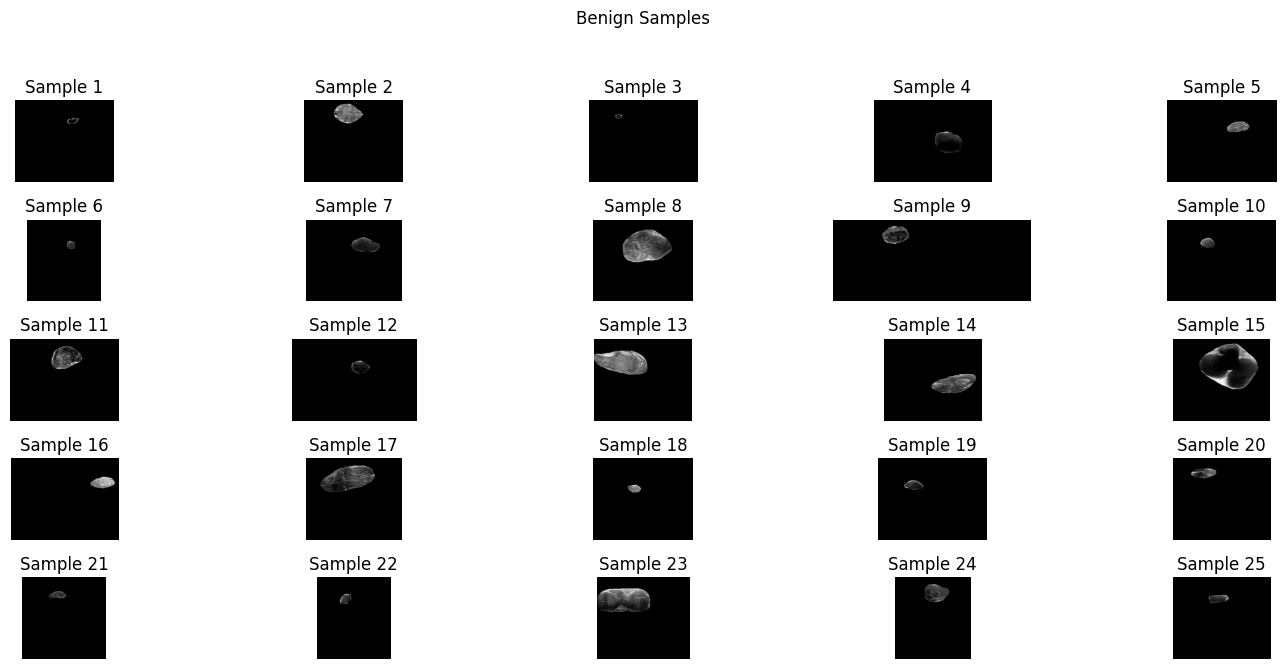

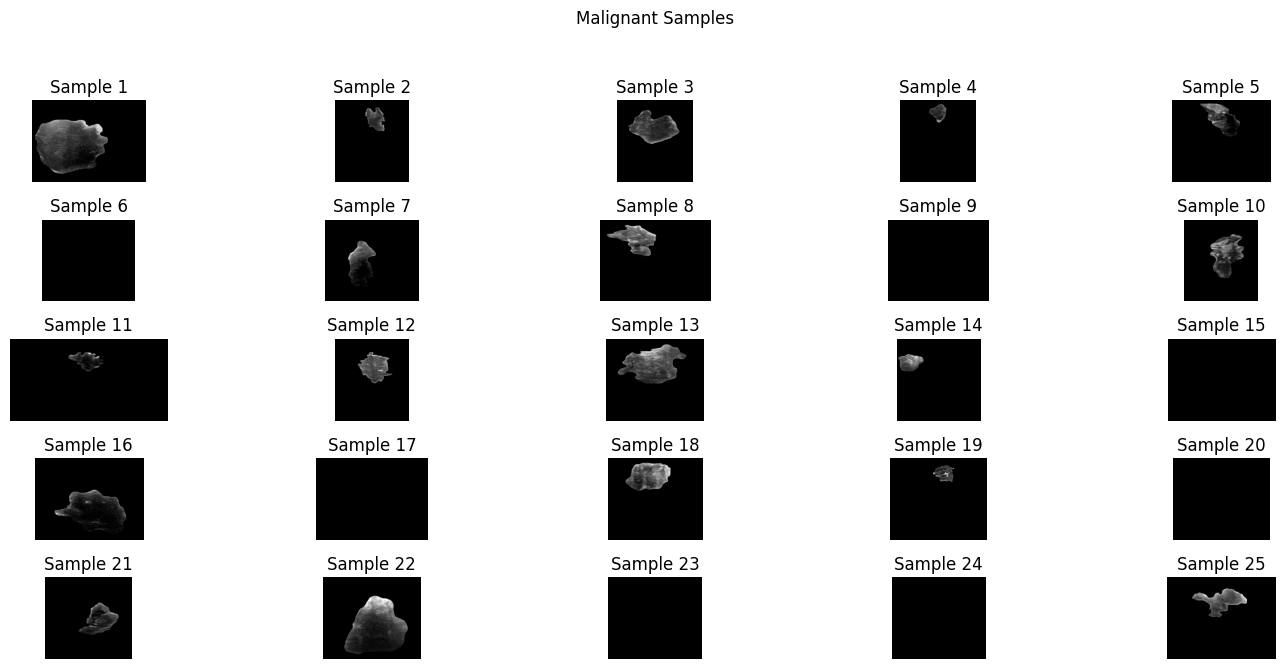

In [9]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def plot_class_samples(base_path, class_name, num_samples=10):
    plt.figure(figsize=(15, 7))
    class_folder = os.path.join(base_path, class_name)
    image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.endswith('.png')] 

    for i in range(min(num_samples, len(image_files))):
        img_path = image_files[i]
        img = Image.open(img_path)#.convert('L')  # Load in grayscale
        ax = plt.subplot(5, 5, i + 1)  # Adjust subplot grid for 10 images: 2 rows and 5 columns
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Sample {i + 1}")
        ax.axis('off')

    plt.suptitle(f"{class_name.capitalize()} Samples")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

base_path = 'data/Ordered_images/'

plot_class_samples(base_path, 'benign', num_samples=25)

plot_class_samples(base_path, 'malignant', num_samples=25)

## Is there a class imbalance? 

In [ ]:
combined_df['classification'].value_counts()

In [ ]:
combined_df

# Model building

## Loading data with keras.preprocessing function (tip from Vlad)

In [25]:
import tensorflow as tf

base_path = 'data/Ordered_images/'

# parameters for the dataset generation
batch_size = 32
img_height = 180  # what should the input size be? 
img_width = 180   # ?

# Create training dataset from directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    labels='inferred', 
    label_mode='int',   # Labels are returned as integers
    class_names=['benign', 'malignant'], # class names
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),  # resize images to the specified size
    shuffle=True,        # shuffles the data
    seed=123,            # seed for shuffling and transformations
    validation_split=0.2,  # image proportion for validation
    subset='training',  
)

# Crreating validation set
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    labels='inferred',
    label_mode='int',
    class_names=['benign', 'malignant'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 1032 files belonging to 2 classes.
Using 826 files for training.
Found 1032 files belonging to 2 classes.
Using 206 files for validation.


## Kind of classical model (baseline?)

In [17]:
from tensorflow.keras import layers, models

# define the model
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

# compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 20, 20, 128)     

In [18]:
history = model1.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=10
)

loss, accuracy = model1.evaluate(validation_dataset)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)


Epoch 1/10
26/26 [==============================] - 69s 3s/step - loss: 2.0681 - accuracy: 0.6404 - val_loss: 0.5940 - val_accuracy: 0.7621
Epoch 2/10
26/26 [==============================] - 83s 3s/step - loss: 0.4971 - accuracy: 0.8220 - val_loss: 0.5111 - val_accuracy: 0.7816
Epoch 3/10
26/26 [==============================] - 65s 3s/step - loss: 0.3134 - accuracy: 0.9128 - val_loss: 0.4958 - val_accuracy: 0.8204
Epoch 4/10
26/26 [==============================] - 70s 3s/step - loss: 0.1437 - accuracy: 0.9528 - val_loss: 0.5410 - val_accuracy: 0.7913
Epoch 5/10
26/26 [==============================] - 66s 3s/step - loss: 0.0717 - accuracy: 0.9746 - val_loss: 0.6474 - val_accuracy: 0.8155
Epoch 6/10
26/26 [==============================] - 68s 3s/step - loss: 0.0331 - accuracy: 0.9903 - val_loss: 0.6262 - val_accuracy: 0.8107
Epoch 7/10
26/26 [==============================] - 66s 3s/step - loss: 0.0217 - accuracy: 0.9939 - val_loss: 0.5921 - val_accuracy: 0.8252
Epoch 8/10
26/26 [==

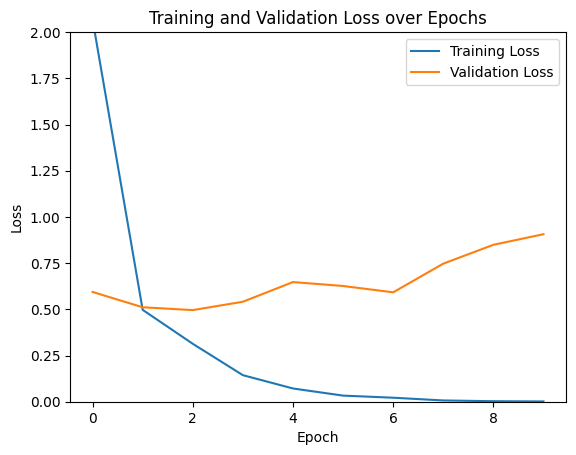

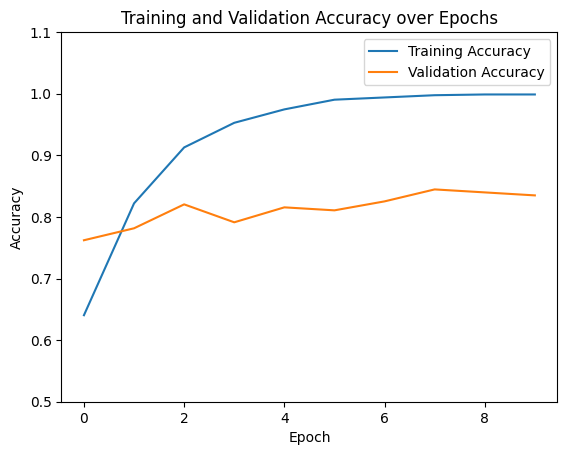

In [21]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,2)
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.ylim(0.5,1.1)
plt.legend()
plt.show()

## Using VGG16 with images as RGB (has to be changed in Vlad's code)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

# Load the pre-trained VGG16 model without the top (fully connected) layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base to prevent the weights from being updated during training
vgg_model.trainable = False

# Add custom classification layers on top of the VGG16 base
x = Flatten()(vgg_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=vgg_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


In [27]:
history = model.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=10,
    batch_size = 32)


loss, accuracy = model.evaluate(validation_dataset)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)

Epoch 1/10
26/26 [==============================] - 776s 30s/step - loss: 0.2048 - accuracy: 0.9262 - val_loss: 0.2023 - val_accuracy: 0.9272
Epoch 2/10
26/26 [==============================] - 618s 24s/step - loss: 0.1196 - accuracy: 0.9625 - val_loss: 0.1876 - val_accuracy: 0.9369
Epoch 3/10
26/26 [==============================] - 579s 22s/step - loss: 0.0545 - accuracy: 0.9758 - val_loss: 0.2013 - val_accuracy: 0.9515
Epoch 4/10
26/26 [==============================] - 584s 23s/step - loss: 0.0393 - accuracy: 0.9903 - val_loss: 0.2255 - val_accuracy: 0.9369
Epoch 5/10
26/26 [==============================] - 580s 22s/step - loss: 0.0294 - accuracy: 0.9939 - val_loss: 0.1994 - val_accuracy: 0.9320
Epoch 6/10
26/26 [==============================] - 577s 22s/step - loss: 0.0195 - accuracy: 0.9988 - val_loss: 0.2211 - val_accuracy: 0.9417
Epoch 7/10
26/26 [==============================] - 572s 22s/step - loss: 0.0171 - accuracy: 0.9976 - val_loss: 0.2447 - val_accuracy: 0.9369
Epoch 

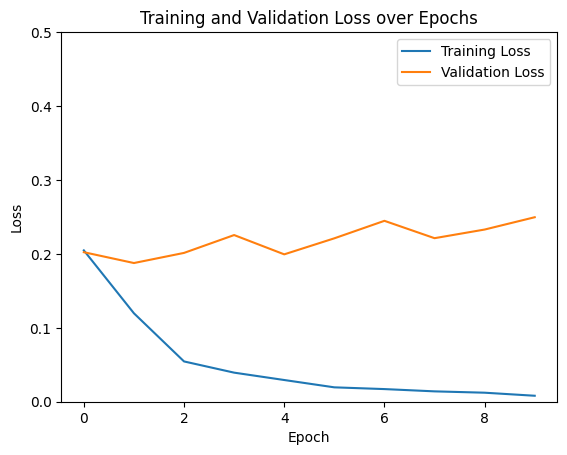

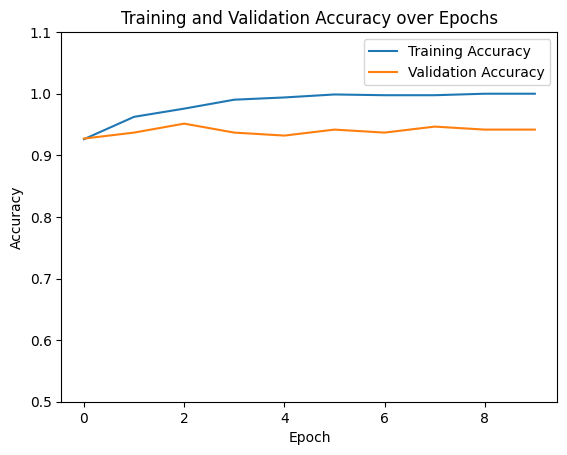

In [33]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,0.5)
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.ylim(0.5,1.1)
plt.legend()
plt.show()


##  Using VGG16 with images as RGB and regularizers L2 = 0.01

In [28]:
from tensorflow.keras import regularizers

# Load the pre-trained VGG16 model without the top (fully connected) layers
vgg_model2 = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base to prevent the weights from being updated during training
vgg_model2.trainable = False

# Add custom classification layers on top of the VGG16 base
x = Flatten()(vgg_model2.output)
x = Dense(128, activation='relu',  kernel_regularizer=regularizers.l2(0.01))(x)
predictions = Dense(1, activation='sigmoid',  kernel_regularizer=regularizers.l2(0.01))(x)

# Create the new model
model_vggL2 = Model(inputs=vgg_model2.input, outputs=predictions)

# Compile the model
model_vggL2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model_vggL2.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0   

In [29]:
history = model_vggL2.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=10,
    batch_size = 32)


loss, accuracy = model_vggL2.evaluate(validation_dataset)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)

Epoch 1/10
 2/26 [=>............................] - ETA: 9:20 - loss: 12.1735 - accuracy: 0.5469

KeyboardInterrupt: 

## Data preprocessing and augmentation 

## Edge detection: is it true that benign lesions are rather round and malignant ones are rather irregularly shaped? 

## Inspect Preprocessed Images?

## Baseline model